# 사이킷런으로 시작하는 머신러닝
# 2-1. 사이킷런 소개와 특징
- 사이킷런은 파이썬 기반의 머신러닝을 위한 가장 쉽고 효율적인 개발 라이브러리를 제공합니다

In [4]:
# conda install scikit-learn
# pip install scikit-learn

In [7]:
import sklearn
print(sklearn.__version__)

0.24.1


# 2-2. 첫 번째 머신러닝 만들어 보기 - 붗꽃, 품종 예측하기

- classification은 대표적인 지도학습 방법의 하나이다. 
- 지도학습 : 학습을 위한 다양한 피처와 분류 결정값인 레이블 데이터로 모델을 학습한 뒤, 별도의 테스트 데이터 세트에서 미지의 레이블을 예측한다. 명확한 정답이 주어지 데이터 세트를 학습 데이터 세트, 머신러닝 모델의 예측 성능을 평가하기 위해 별도로 주어진 데이터 세트를 테스트 데이터 세트로 지칭한다.

- 다음과 같은 순서로 분류를 수행한다
1. 데이터 세트 분리 : train_test_split()
2. 모델 학습 : model = DecisionTreeClassifier(random_state=11) 으로 객체 지정 후 model.fit(X_train,y_train)으로 학습
3. 예측 수행 : pred = model.predict(X_test)
4. 평가 : accuracy_score(y_test,pred)

In [8]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [10]:
import pandas as pd

# 붓꽃 데이터 세트를 로딩합니다.
iris = load_iris()

# iris.data는 Iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있습니다.
iris_data = iris.data

# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있습니다.
iris_label = iris.target
print('iris_label값:',iris_label)
print('iris target명:',iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환합니다
iris_df = pd.DataFrame(iris_data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris_label값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [13]:
# feature 데이터와 label 데이터를 train과 test 쌍으로 분리한다. random 숫자는 11이다. test 데이터는 20퍼센트이다
(X_train,X_test,y_train,y_test) = train_test_split(iris_data,iris_label,test_size = 0.2,random_state=11)

In [19]:
#DecisionTreeClassifier객체의 fit()메소드에 학습용 feature데이터 속성과 결정값 데이터 세트를 입력해 호출하면 학습을 수행한다.

# DecisionTreeClassifier 객체 생성
model= DecisionTreeClassifier(random_state=11)

# 학습 수행
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=11)

- 이제 의사결정트리 기반의 DecisionTreeClassfier객체는 학습 데이터를 기반으로 학습이 완료되었다. 이렇게 학습된 DecisionTreeClassifier객체를 이용해 예측을 수행한다.
- 예측은 반드시 학습 데이터가 아닌 다른 데이터를 이용해야 하며, 일반적으로 test data set을 이용한다.

In [20]:
# test데이터의 예측값이 pred에 저장된다. pred는 label처럼 1개의 벡터이다
pred = model.predict(X_test)

In [21]:
# 정확도 측정 - acuuracy_score()
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred))) 

예측 정확도: 0.9333


# 2-3. 사이킷런의 기반 프레임워크 익히기
### Estimator 이해 및 fit(), predict() 메서드
- 모든 사이킷런 클래스는 fit()과  predict()만을 이용해 간단하게 학습과 예측 결과를 반환한다.
- Classifier : 분류알고리즘을 구현한 클래스
- Regressor : 회귀알고리즘을 구현한 클래스
- Classifier와 Regressor을 합쳐서 Estimator라고 부른다

### 사이킷런의 주요 모듈
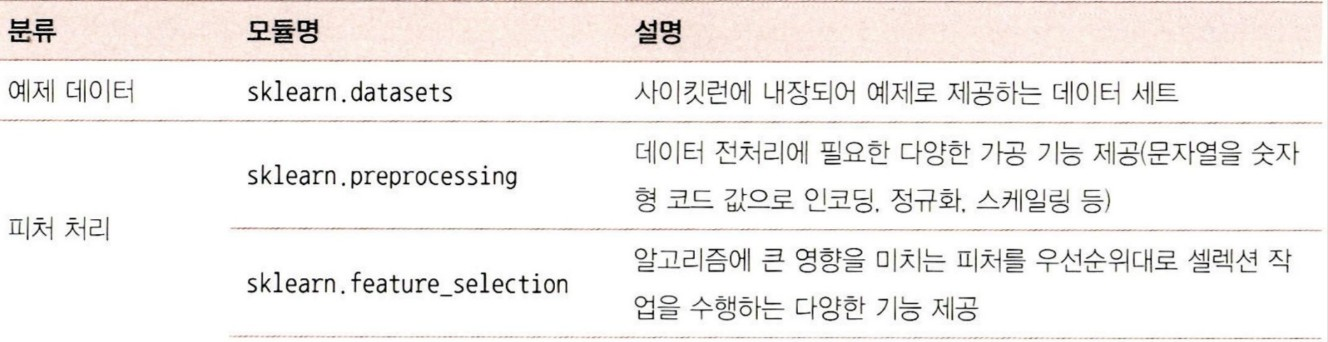
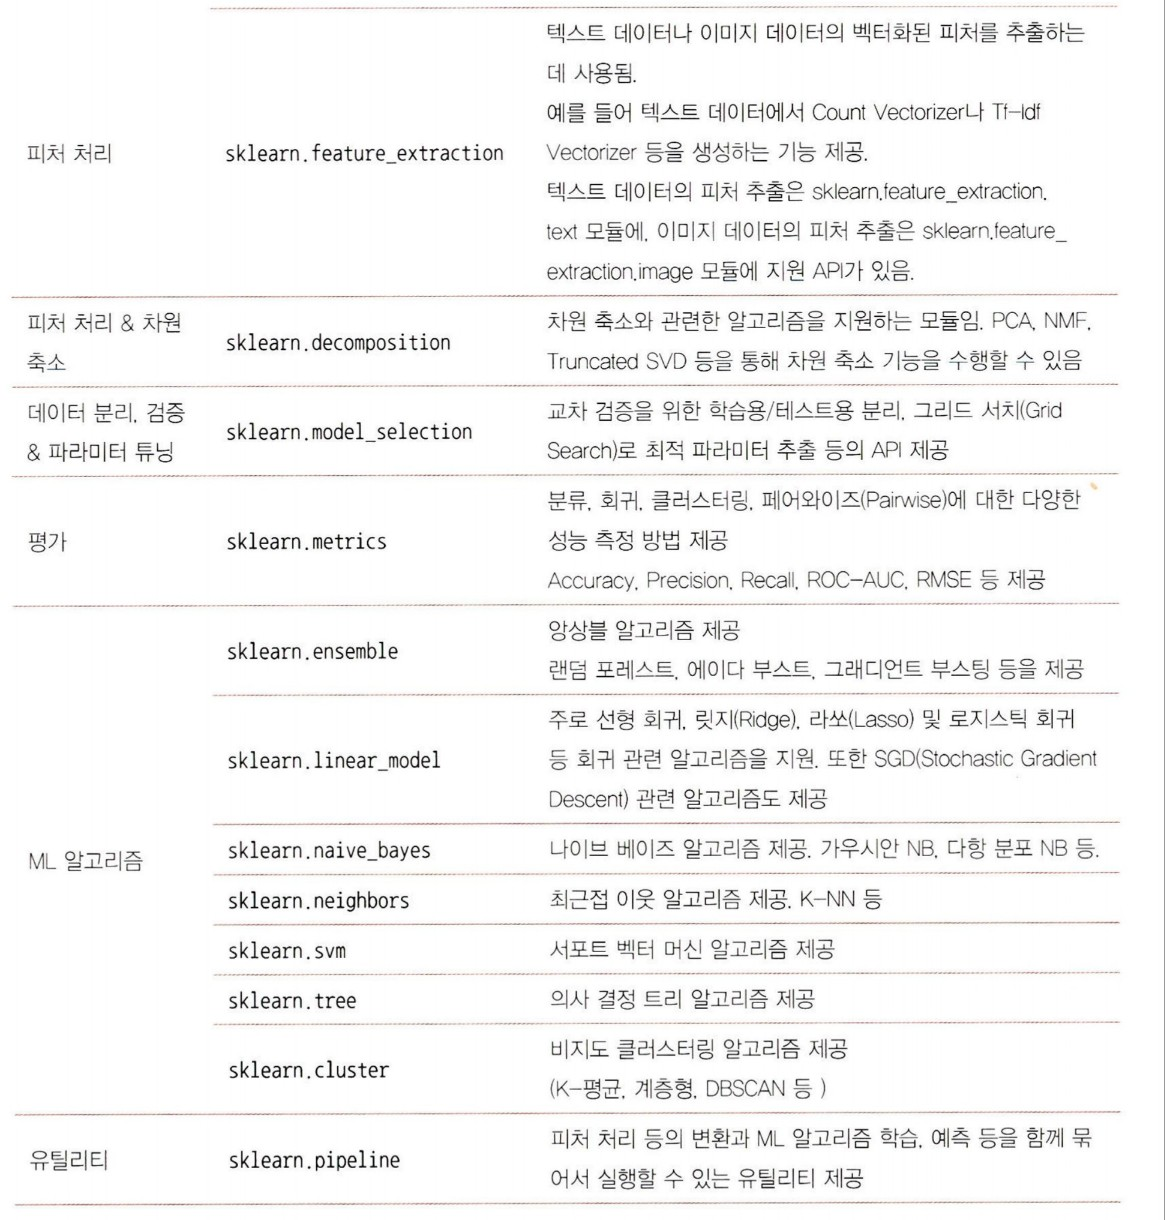

### 내장된 예제 데이터 세트
- datasets.load_boston(), datasets.load_breast_cancer(), datasets.load_diabetes(), datasets.load_digits(), datasets.load_iris()가 내장되어 있다
- fetch 계열의 명령은 데이터의 크기가 커서 패키지에 저장X, 인터넷에서 다운받아 scikit_learn_data라는 서브 디렉터리에 저장한 후 추후 불러들이는 데이터이다
- 키: data(feature의 데이터 세트),target(분류 시 label값, 회귀 시 숫자 결과값),target_name(개별 label의 이름), feature_name(feature의 이름), DESCR(데이터 세트에 대한 설명과 각 피처의 설명)로 구성되어 있다. 

In [22]:
from sklearn.datasets import load_iris

In [23]:
iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils.Bunch'>


In [24]:
keys = iris_data.keys()
print("붓꽃 데이터 세트의 키들:",keys )

붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [28]:
print("\n feature_names 의 type:", type(iris_data.feature_names))
print(" feature_names 의 shape: ", len(iris_data.feature_names))
print(iris_data.feature_names)

print("\n target_names 의 type:", type(iris_data.target_names))
print(" target_names 의 shape: ", len(iris_data.target_names))
print(iris_data.target_names)

print("\n data 의 type:", type(iris_data.data))
print(" data 의 shape: ", iris_data.data.shape)
print(iris_data['data'])

print("\n target 의 type:", type(iris_data.target))
print(" target 의 shape: ", iris_data.target.shape)
print(iris_data.target)


 feature_names 의 type: <class 'list'>
 feature_names 의 shape:  4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names 의 type: <class 'numpy.ndarray'>
 target_names 의 shape:  3
['setosa' 'versicolor' 'virginica']

 data 의 type: <class 'numpy.ndarray'>
 data 의 shape:  (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2

# 2-4 Model Selection의 모듈 소개
### 학습/테스트 데이터 세트 분리 - train_test_split()

In [30]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris= load_iris()
model = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
model.fit(train_data,train_label)
pred = model.predict(train_data)
print('예측 정확도: ', accuracy_score(train_label, pred))

예측 정확도:  1.0


이렇게 하면 정확도가 100%가 된다. 학습데이터 세트를 기반으로 예측했기 때문이다. 따라서, train_test_split()을 이용하여 train dataset과 test dataset을 분리해줄 필요가 있다. 다음은 train_test_split()의 파라미터의 예이다. 아래는 train_test_split()을 이용하여 학습과 평가를 실시한 결과이다.
- test_size = 0.2
- train_size = 0.8
- shuffle = True
- random_state = 123

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

model = DecisionTreeClassifier()
iris_data = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris_data.data, iris_data.target,test_size=0.2,random_state=121)

In [36]:
model.fit(X_train,y_train)
pred = model.predict(X_test)
print("예측 정확도: {0:.4f}".format(accuracy_score(y_test,pred)))

예측 정확도: 0.9667


### 교차 검증
- 앞에서 train dataset과 test dataset을 이용하는 방법은 해당 test data에 과적합되는 학습 모델이 만들어져 다른 테스트용 데이터가 들어올 경우 성능이 저하되는 과적합 현상이 나타날 수 있다. ML은 데이터에 기반한다. 데이터는 이상치, 분포도, 다양한 속성값, 피처 중요도 등 여러 ML에 영향을 미치는 요소를 가지고 있다. 특정 ML알고리즘에서 최적으로 동작할 수 있도록 데이터를 선별해 학습한다면 실제 데이터 양식과는 많은 차이가 있을 것이고 결국 성능 저하로 이어진다.
- 이 점을 개선하기 위해 교차 검증을 이용헤 더 다양한 학습과 평가를 수행해야 한다.
- ML에 사용되는 데이터 세트를 세분화하여 학습, 검증, 테스트 데이터 세트로 나눌 수 있다. 테스트 데이터 외에 별도의 검증 데이터 세트를 둬서 최종 평가 이전에 학습된 모델을 다양하게 평가하는 데 사용한다
#### 1. K폴드 교차 검증 - KFold, StratiifiedKFold 클래스
- 가장 보편적으로 사용되는 교차 검증 기법
- K개의 데이터 폴드 세트를 만들어서 K번만큼 각 폴드 세트에 학습과 검증평가를 반복적으로 수행
- 1. 데이터 세트를 K등분한다.
- 2. 첫 번째 반복 : 처음부터 처음~4번째 등분을 학습 데이터 세트로, 마지막 5번째 등분을 검증 데이터 세트로 설정하고 학습과 평가를 수행
- 3. 위와 같은 반복을 검증 데이터 세트가 되는 등분을 겹치지 않게 바꿔가며 k번 반복한다.
- 4. 5개의 예측 평가를 평균하여 K 폴드 결과로 반영한다.

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold   # train_test_split이 아닌 KFold
import numpy as np
iris = load_iris()
features=iris.data
label = iris.target
model = DecisionTreeClassifier(random_state = 156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성.
kfold = KFold(n_splits=5) # k=5 인 KFold 객체 생성
cv_accuracy=[]
print("붓꽃 데이터 세트 크기:", features.shape[0])

붓꽃 데이터 세트 크기: 150


In [45]:
n_iter=0
# KFold 객체의 split()를 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):
    # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test= features[train_index],features[test_index]
    y_train,y_test=label[train_index],label[test_index]
    # 학습 및 예측
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    n_iter += 1
    # 반복 시마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test,pred),4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print("\n#{0} 교차 검증 정확도 :{1},학습 데이터 크기: {2}, 검증 데이터 크기: {3}"
          .format(n_iter,accuracy,train_size,test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print("\n## 평균 검증 정확도:", np.mean(cv_accuracy))


#1 교차 검증 정확도 :1.0,학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.9667,학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8667,학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333,학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.7333,학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


#### Stratified K 폴드
- Stratified K 폴드: 불균형한 분포도를 가진 레이블 데이터 집합을 위한 K 폴드 방식이다.
- 불균형한 분포도를 가진 레이블 데이터 집합: 특정 레이블 값이 특이하게 많거나 매우 적어서 값의 분포가 한쪽으로 치우치는 것
- EX) 작은 비율로 1레이블 값이 있는 대출 사기 데이터는 등분 시 0과 1의 비율을 제대로 반영X
- Stratified K 폴드는 원본 데이터의 레이블 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터 세트를 분배한다

In [48]:
import pandas as pd
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [53]:
# k=3인 KFold를 수행하면 다음과 같다
kfold = KFold(n_splits=3)
n_iter=0
for train_index,test_index in kfold.split(iris_df):
    n_iter+=1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print("\n##교차 검증:{0}".format(n_iter))
    print('학습 레이블 데이터 분포: \n',label_train.value_counts())
    print('검증 레이블 데이터 분포: \n',label_test.value_counts())


##교차 검증:1
학습 레이블 데이터 분포: 
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 0    50
Name: label, dtype: int64

##교차 검증:2
학습 레이블 데이터 분포: 
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 1    50
Name: label, dtype: int64

##교차 검증:3
학습 레이블 데이터 분포: 
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 2    50
Name: label, dtype: int64


이 경우 레이블 값은 0,1,2로 모두 50개로 동일하지만, 000...0111...1222...2 이런 꼴로 분포하므로 적합이 제대로 이루어지지 않는다.
StratifiedKFold는 데이터 세트가 전체 레이블 값의 분포도를 반영하지 못하는 문제를 해결해 준다.

In [54]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3)
n_iter=0
for train_index, test_index in skf.split(iris_df,iris_df["label"]):# 여기서는 split 시 label의 분포가 중요하므로 반드시 split안에 써줘ㅑ 한다!
    n_iter+=1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print("\n##교차 검증:{0}".format(n_iter))
    print('학습 레이블 데이터 분포: \n',label_train.value_counts())
    print('검증 레이블 데이터 분포: \n',label_test.value_counts())


##교차 검증:1
학습 레이블 데이터 분포: 
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 0    17
1    17
2    16
Name: label, dtype: int64

##교차 검증:2
학습 레이블 데이터 분포: 
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 0    17
2    17
1    16
Name: label, dtype: int64

##교차 검증:3
학습 레이블 데이터 분포: 
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 1    17
2    17
0    16
Name: label, dtype: int64


이렇게 하면 label의 분포가 잘 반영됨을 알 수 있다.


다음 코드는 StratifiedKFold를 이용해 데이터를 분리한 것이다.

In [64]:
model= DecisionTreeClassifier(random_state=156)
skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy = []
# StratifiedKFold의 split() 호출 시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features,label):
    X_train, X_test= features[train_index],features[test_index]
    y_train,y_test=label[train_index],label[test_index]
    
    # 학습 및 예측
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    
    # 반복 시마다 정확도 측정
    n_iter+=1
    accuracy = np.round(accuracy_score(y_test,pred),4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print("\n{0} 교차 검증 정확도:{1}, 학습 데이터 크기: {2}, 검증 데이터 크기{3}"
         .format(n_iter,accuracy,train_size,test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)
    # 교차 검증별 정확도 및 평균 정확도 계산
    print('\n## 교차 검증별 정확도:',np.round(cv_accuracy,4))
    print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


1 교차 검증 정확도:0.98, 학습 데이터 크기: 100, 검증 데이터 크기50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

## 교차 검증별 정확도: [0.98]

## 평균 검증 정확도: 0.98

2 교차 검증 정확도:0.94, 학습 데이터 크기: 100, 검증 데이터 크기50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

## 교차 검증별 정확도: [0.98 0.94]

## 평균 검증 정확도: 0.96

3 교차 검증 정확도:0.98, 학습 데이터 크기: 100, 검증 데이터 크기50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]

## 평균 검증 정확도: 0.9666666666666667


회귀(Regression)에서는 Stratified K 폴드가 지원되지 않는다. 회귀의 결정값은 이산값 형태의 레이블이 아니라 연속된 숫자값이기 때문에 결정값별로 분포를 정하는 것이 의미가 없기 때문이다.
#### 3. 교차 검증을 보다 간편하게 - cross_val_score()
- [1.폴드세트 설정, 2. for루프반복으로 학습 및 테스트 데이터 인덱스 추출, 3. 반복적 학습과 예측 수행 ]의 일련의 과정을 한꺼번에 수행한다

다음 코드에서 cross_val_score()의 자세한 사용법을 살펴보자. 교차 검증 폴드 수는 3, 성능 평가 지표는 정확도인 accuracy로 한다

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
model = DecisionTreeClassifier(random_state=156)
data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(model,data,label,scoring = "accuracy",cv=3)  #교차 검증 폴드 수는 3, 성능 평가 지표는 정확도인 accuracy
print('교차 검증별 정확도:',np.round(scores,4))
print('평균 검증 정확도:', np.round(np.mean(scores),4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


#### 4. GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에
- 하이퍼 파라미터는 머신러니 알고리즘을 구성하는 주요 구성 요소이며, 이 값을 조정해 알고리즘의 예측 성능을 개선할 수 있다
- 결정 트리 알고리즘의 여러 하이퍼 파라미터를 순차적으로 변경하면서 최고 성능을 가지는 파라미터 조합을 찾고자 한다면 다음과 같이 파라미터의 집합을 맞들고 이를 순차적으로 적용하며 최적화를 진행할 수 있다

In [69]:
grid_parameters = {'max_depth':[1,2,3], 
                  'min_samples_split':[2,3]} 

2*3 의 6회에 걸쳐 파라미터를 순차적으로 바꿔 실행하며 최적의 파라미터와 수행 결과를 도출할 수 있다. for 루프로 모든 파라미터를 번갈아 입력하면서 학습시키는 방법을 좀 더 유연하게 API레벨에서 제공한 것이다

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습 데이터와 테스트 데이터 분리
iris = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.2,random_state=121)
dtree=DecisionTreeClassifier()

### 파라미터를 딕셔너리 형태로 설정
parameters= {'max_depth':[1,2,3], 'min_samples_split':[2,3]} 

그 후 학습 데이터 세트를 GridSearchCV객체의 fit(학습 데이터 세트) 메소드에 인자로 입력한다.
GridSearchCV 객체의 fit(학습 데이터 세트) 메소드를 수행하면 학습 데이터를 cv에 기술된 폴딩 세트로 분할해 param_grid에 기술된 하이퍼 파라미터를 순차적으로 변경하면서 학습/평가를 수행하고 그 결과를 cv_results_ 속성에 기록한다. cv_results_를 Pandas의 DataFrame으로 변환하면 내용을 더 쉽게 볼 수 있다.

In [74]:
import pandas as pd
# param_grid의 하이퍼 파라미터를 3개의 train,test set fold로 나누어 테스트 수행 설정
### refit = True가 default임. True 이면 가장 좋은 파라미터 설정으로 재학습시킴
model = GridSearchCV(dtree,param_grid=parameters,cv=3,refit=True)

# 붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습/평가
model.fit(X_train,y_train)

# GridSearchCV 결과를 추출해 DataFrame으로 변환
scores_df= pd.DataFrame(model.cv_results_)
scores_df[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


- 위 결과에서 총 6개의 결과를 볼 수 있으며 이는 하이퍼 파라미터 max_depth와 min_samples_split을 순차적으로 총 6번 변경하면서 학습 및 평가를 수행했음을 알 수 있다.
- 맨 마지막 두 행이 공동 1위로 예측 성능이 높음을 알 수 있다

In [77]:
print('GridSearchCV 최적 파라미터:', model.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(model.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.9750


In [79]:
# GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator = model.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 학습이 되었으므로 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도:{0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도:0.9667
